In [1]:
# 0 = No
# 1 = Yes

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

from sklearn import preprocessing

In [26]:
models = []
accuracy = []
f1 = []
def score(model: str, test, predicted):
    print(f"Model: {model}")
    models.append(model) # adding the values in the models list
    # Calculate accuracy_LR
    accuracy_LR = accuracy_score(test, predicted)
    accuracy.append(round(accuracy_LR*100, 2)) # adding the values in the accuracy list
    print("\naccuracy_LR:", round(accuracy_LR*100, 2), "%")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(test, predicted)

    # precision, recall, f1, roc
    precision_LR = round(precision_score(test,predicted)*100, 2)
    recall_LR = round(recall_score(test,predicted)*100,2)
    f1_LR = round(f1_score(test,predicted)*100,2)
    f1.append(f1_LR) # adding the values in the f1 list
    roc_LR = round(roc_auc_score(test,predicted)*100,2)

    print("\nPrecision: ",precision_LR,'%')
    print("Recall score: ",recall_LR,'%')
    print("F1 Score:", f1_LR,'%')
    print("ROC score: ",roc_LR,'%')
    
    # showing the confusion matrix in heatmap
    plt.figure(figsize=(3, 3))
    sb.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [4]:
data = pd.read_csv('PCOS_Final_Data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              541 non-null    int64  
 1   Sl. No                  541 non-null    int64  
 2   Patient File No.        541 non-null    int64  
 3   PCOS (Y/N)              541 non-null    int64  
 4    Age (yrs)              541 non-null    int64  
 5   Weight (Kg)             541 non-null    float64
 6   Height(Cm)              541 non-null    float64
 7   BMI                     541 non-null    float64
 8   Blood Group             541 non-null    int64  
 9   Pulse rate(bpm)         541 non-null    int64  
 10  RR (breaths/min)        541 non-null    int64  
 11  Hb(g/dl)                541 non-null    float64
 12  Cycle(R/I)              541 non-null    int64  
 13  Cycle length(days)      541 non-null    int64  
 14  Marraige Status (Yrs)   541 non-null    fl

In [6]:
#There is a column without name,So, first naming it.
data = data.rename(columns={'Unnamed: 0': 'index'})

In [7]:
#Droping the columns which are not related to the output
data = data.drop(['index','Sl. No','Patient File No.'],axis=1)

In [8]:
data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45


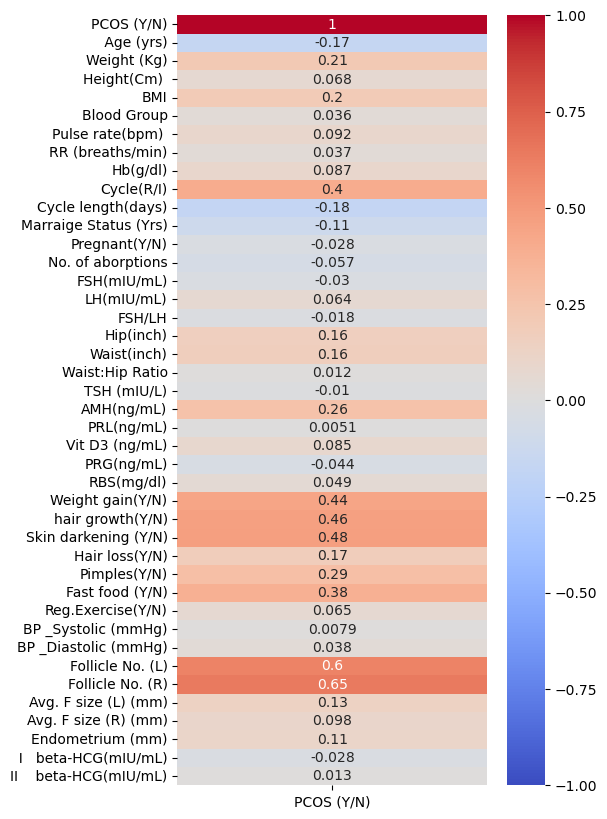

In [9]:
plt.figure(figsize=(5, 10))
target_correlation = data.corr()[['PCOS (Y/N)']]
sb.heatmap(target_correlation, annot=True, cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

In [30]:
data['PCOS (Y/N)'].value_counts()

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64

In [10]:
# Separate the features (X) and the target variable (y)
x = data.drop(columns='PCOS (Y/N)')  
y = data['PCOS (Y/N)']  

# Applying Mutual info for finding better features from the dataset

In [11]:
# Compute mutual information between each feature and the target variable
mutual_info = mutual_info_classif(x, y)

In [12]:
# Create a DataFrame to store feature names and their corresponding mutual information scores
mi_scores = pd.Series(mutual_info, index=x.columns).sort_values(ascending=False)

# Print the mutual information scores for each feature
mi_scores

Follicle No. (R)          0.232086
Follicle No. (L)          0.221642
Cycle length(days)        0.107346
Skin darkening (Y/N)      0.101649
hair growth(Y/N)          0.097682
Weight gain(Y/N)          0.089168
Fast food (Y/N)           0.078176
AMH(ng/mL)                0.074342
Cycle(R/I)                0.071071
FSH/LH                    0.066714
PRL(ng/mL)                0.064401
Pimples(Y/N)              0.056829
 Age (yrs)                0.047364
Waist:Hip Ratio           0.031498
TSH (mIU/L)               0.028529
FSH(mIU/mL)               0.027135
Marraige Status (Yrs)     0.024843
Hb(g/dl)                  0.024646
LH(mIU/mL)                0.023545
Waist(inch)               0.022465
Hip(inch)                 0.022243
Pregnant(Y/N)             0.017610
Blood Group               0.014333
Vit D3 (ng/mL)            0.012217
BMI                       0.010975
PRG(ng/mL)                0.010926
Weight (Kg)               0.010920
II    beta-HCG(mIU/mL)    0.004415
Height(Cm)          

In [13]:
top_12_features = mi_scores.index[:12]
X = x[top_12_features]

In [14]:
X.head()

,Follicle No. (R),Follicle No. (L),Cycle length(days),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Fast food (Y/N),AMH(ng/mL),Cycle(R/I),FSH/LH,PRL(ng/mL),Pimples(Y/N)
0,3,3,5,0,0,0,1,2.07,2,2.160326,45.16,0
1,5,3,5,0,0,0,0,1.53,2,6.174312,20.09,0
2,15,13,5,0,0,0,1,6.63,2,6.295455,10.52,1
3,2,2,5,0,0,0,0,1.22,2,3.415254,36.90,0
4,4,3,5,0,0,0,0,2.26,2,4.422222,30.09,0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Follicle No. (R)      541 non-null    int64  
 1   Follicle No. (L)      541 non-null    int64  
 2   Cycle length(days)    541 non-null    int64  
 3   Skin darkening (Y/N)  541 non-null    int64  
 4   hair growth(Y/N)      541 non-null    int64  
 5   Weight gain(Y/N)      541 non-null    int64  
 6   Fast food (Y/N)       541 non-null    int64  
 7   AMH(ng/mL)            541 non-null    float64
 8   Cycle(R/I)            541 non-null    int64  
 9   FSH/LH                541 non-null    float64
 10  PRL(ng/mL)            541 non-null    float64
 11  Pimples(Y/N)          541 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 50.8 KB


In [16]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# Standard Scaler applying for better prediction
x_train = preprocessing.StandardScaler().fit_transform(X_train)
x_test = preprocessing.StandardScaler().fit_transform(X_test)

# Applying Machine Learning Models

# Random Forest Classifier

Model: RandomForest

accuracy_LR: 89.91 %

Precision:  85.19 %
Recall score:  76.67 %
F1 Score: 80.7 %
ROC score:  85.8 %


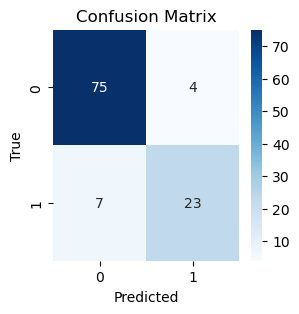

In [27]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
predictions_RFC = RFC.predict(X_test)

score('RandomForest',y_test,predictions_RFC)

# Now prediction test

In [19]:
target_columns = ['Follicle No. (R)','Follicle No. (L)','Cycle length(days)','hair growth(Y/N)','Fast food (Y/N)','Weight gain(Y/N)','Cycle(R/I)','Skin darkening (Y/N)','AMH(ng/mL)','FSH/LH','PRL(ng/mL)','Waist:Hip Ratio','PCOS (Y/N)']
for_test = data[target_columns]

In [20]:
for_test.head()

,Follicle No. (R),Follicle No. (L),Cycle length(days),hair growth(Y/N),Fast food (Y/N),Weight gain(Y/N),Cycle(R/I),Skin darkening (Y/N),AMH(ng/mL),FSH/LH,PRL(ng/mL),Waist:Hip Ratio,PCOS (Y/N)
0,3,3,5,0,1,0,2,0,2.07,2.160326,45.16,0.833333,0
1,5,3,5,0,0,0,2,0,1.53,6.174312,20.09,0.842105,0
2,15,13,5,0,1,0,2,0,6.63,6.295455,10.52,0.900000,1
3,2,2,5,0,0,0,2,0,1.22,3.415254,36.90,0.857143,0
4,4,3,5,0,0,0,2,0,2.26,4.422222,30.09,0.810811,0


In [21]:
input_data = {
     'Follicle No. (R)': 15,
     'Follicle No. (L)': 13,
     'Cycle length(days)': 5,
     'hair growth(Y/N)': 0,
     'Fast food (Y/N)': 1,
     'Weight gain(Y/N)': 0,
     'Cycle(R/I)': 2,
     'Skin darkening (Y/N)': 0,
     'AMH(ng/mL)': 6.63,
     'FSH/LH': 6.29,
     'PRL(ng/mL)': 10.52,
     'Waist:Hip Ratio': 0.9
}

In [22]:
input_df = pd.DataFrame([input_data])

In [23]:
output = RFC.predict(input_df)
output

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Waist:Hip Ratio
Feature names seen at fit time, yet now missing:
- Pimples(Y/N)
